### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Завдання
## 1. Методами порогової та морфологічної обробки відобразити тільки контури циферблату
 Завантажити зображення "digit.jpg" директорії "./examples/"

### Зчитуємо вихідне зображення

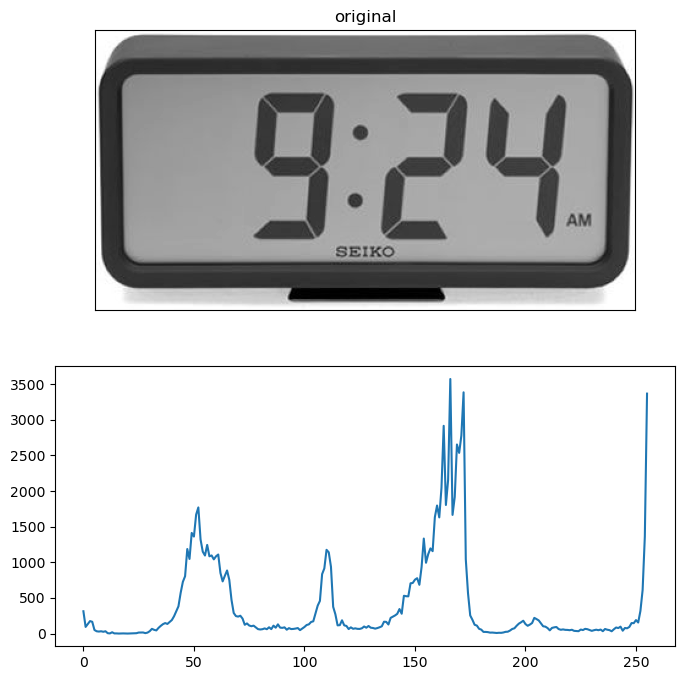

In [2]:
img_1 = cv2.imread("IN/digit.jpg", cv2.IMREAD_GRAYSCALE)

hist_1 = cv2.calcHist([img_1], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 8))
plt.subplot(211), plt.imshow(img_1, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("original")
plt.subplot(212), plt.plot(hist_1)
plt.show();

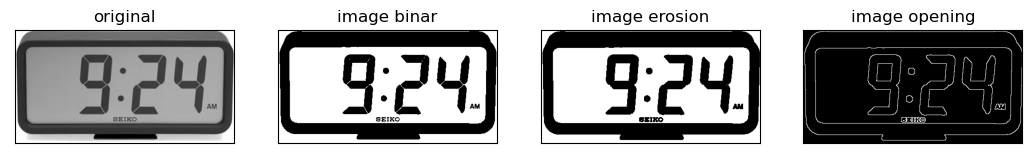

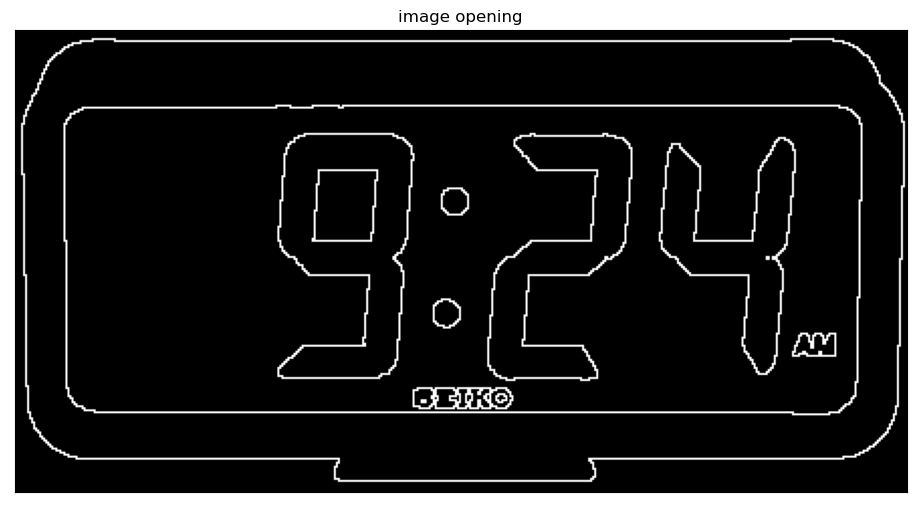

In [3]:
threshold = 125
    
max_value = 255
min_value = 0

img_binar_1 = img_1.copy()
for row in range(img_1.shape[0]):
    for col in range(img_1.shape[1]):
        if (img_1[row][col]) > threshold:
            img_binar_1[row][col] = max_value
        else:
            img_binar_1[row][col] = min_value
n = ([2,2])       
kernel_1 = np.ones(n, np.uint8)
img_erosion_1 = cv2.erode(img_binar_1,kernel_1)
img_opening_1 = cv2.morphologyEx(img_erosion_1, cv2.MORPH_GRADIENT, kernel_1)
    
plt.figure(figsize=(13, 3))
plt.subplot(141), plt.imshow(img_1, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("original")
plt.subplot(142), plt.imshow(img_binar_1, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("image binar")
plt.subplot(143), plt.imshow(img_erosion_1, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("image erosion")
plt.subplot(144), plt.imshow(img_opening_1, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("image opening")

plt.figure(figsize=(13, 6))
plt.imshow(img_opening_1, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("image opening")
plt.show();

## 2. Методами порогової та морфологічної обробки відобразити границі баскетбольного поля
 Завантажити зображення "basketball.jpg" директорії "./examples/"

### Зчитуємо вихідне зображення

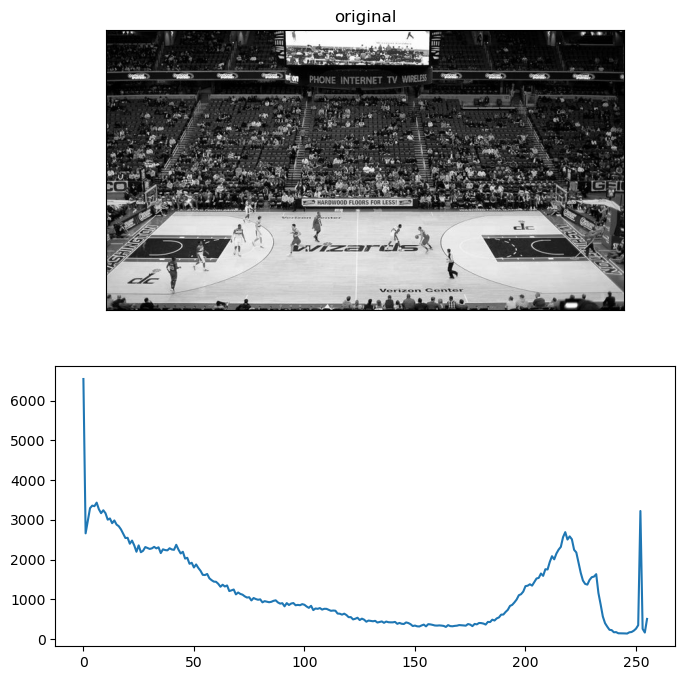

In [4]:
img_2 = cv2.imread("IN/basketball.jpg", cv2.IMREAD_GRAYSCALE)
img_2_rgb = cv2.cvtColor(cv2.imread("IN/basketball.jpg"), cv2.COLOR_BGR2RGB)

hist_2 = cv2.calcHist([img_2], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 8))
plt.subplot(211), plt.imshow(img_2, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("original")
plt.subplot(212), plt.plot(hist_2)
plt.show();

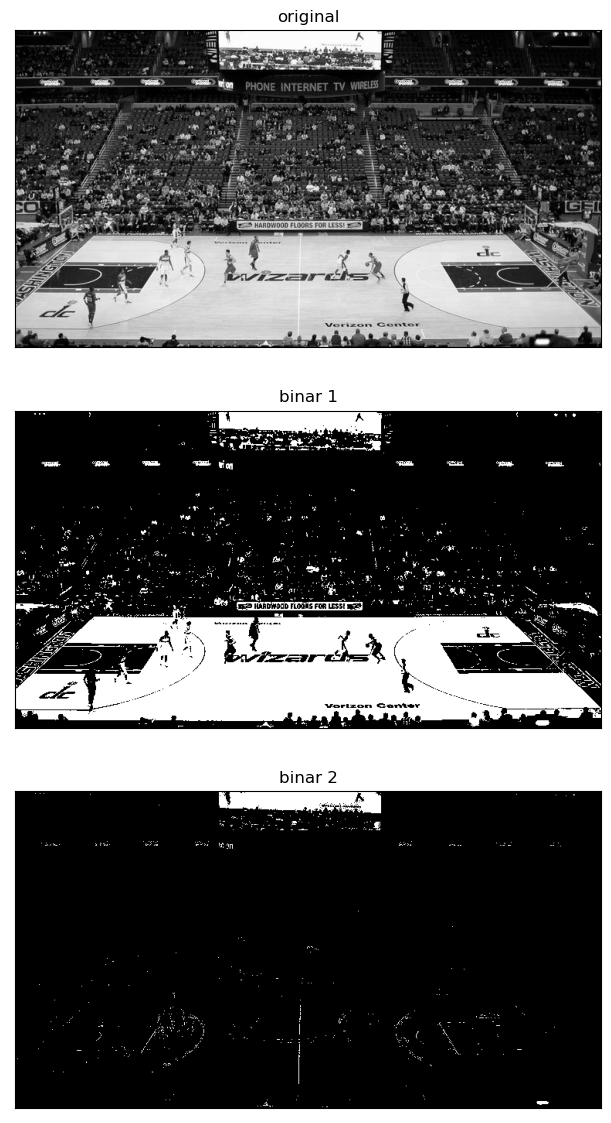

In [5]:
max_value = 255

threshold = 170
img_bin_1 = cv2.threshold(img_2, threshold, max_value, cv2.THRESH_BINARY)[1]

threshold = 240
img_bin_2 = cv2.threshold(img_2, threshold, max_value, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(8, 14))
plt.subplot(311), plt.imshow(img_2, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("original")
plt.subplot(312), plt.imshow(img_bin_1, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("binar 1")
plt.subplot(313), plt.imshow(img_bin_2, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("binar 2")

plt.show()

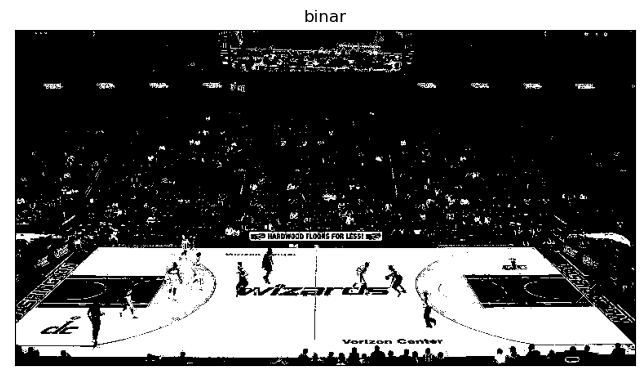

In [6]:
img_bin = img_bin_2 - img_bin_1

plt.figure(figsize=(8, 14))
plt.imshow(img_bin, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("binar")
plt.show()

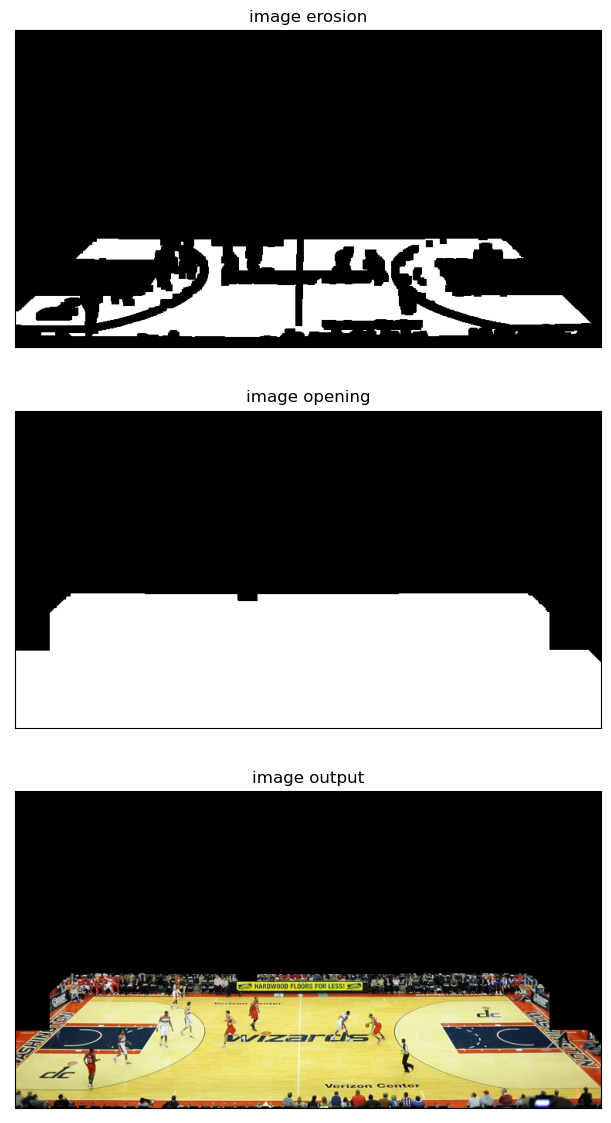

In [7]:
n = ([5,5])
kernel = np.ones(n, np.uint8)

img_erosion = cv2.erode(img_bin, kernel, iterations = 2)

img_opening = cv2.morphologyEx(img_erosion, cv2.MORPH_GRADIENT, kernel, iterations = 17) 

img_output = cv2.bitwise_and(img_2_rgb, img_2_rgb, mask = img_opening) 

plt.figure(figsize=(8, 14))
plt.subplot(311), plt.imshow(img_erosion, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("image erosion")
plt.subplot(312), plt.imshow(img_opening, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title("image opening")
plt.subplot(313), plt.imshow(img_output), plt.xticks([]), plt.yticks([]), plt.title("image output")
plt.show()